# Wallmart Case

In [261]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [262]:
df_walmart = pd.read_csv("/Users/mojo/ML/Scaler/Projects/Wallmart/walmart_data.csv")
df_walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Missing Values, Data types and Shape of data

In [263]:
# Shape and size of data
df_walmart.shape

(550068, 10)

In [264]:
# Missing Value
df_walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [265]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- No missing values
- We can see that there are 5 numerical and 5 categorical features
- Numericals: User_ID, Occupation,Marital_Status,Product_Category and Purchase
- Categorical: Product_ID, Gender, Age( represents age group), City_Category, Stay_In_Current_City_Years
- Looking at the data we can see that the Purchase is the only column which should be in numerical.
- User_ID, Occupation,Marital_Status,Product_Category : These all should be changed into categorical data. 
- We are going to change all of variables as categorical form for consistancy reasons.

In [266]:
for col in df_walmart.columns:
    if col!='Purchase':
        # print(col)
        df_walmart[col] = df_walmart[col].astype('category')
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## Non-Graphical Analysis: Value counts and unique attributes ​

In [267]:
df_walmart.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,5891.0,1001680.0,1026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,21.0,4.0,72308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,2.0,0.0,324731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,550068.0,20.0,5.0,150933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


- We can see the unique values of all the columns in the above table.
- We can see that in purchase mean is to the right of the median then we can say that the data is slightly right skewed.
- There are total 20 types of products.
- There are 21 types occupation available in the state.

In [268]:
attr = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years','Marital_Status']
for col in attr:
    print(df_walmart[col].value_counts(normalize=True)*100)
    print("*"*50)

M    75.310507
F    24.689493
Name: Gender, dtype: float64
**************************************************
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64
**************************************************
B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64
**************************************************
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64
**************************************************
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64
**************************************************


Observations:
- Unlike the popular belief 25% of the users are female and 75% are male. Need to explore more on it
- Users in age Group 26-35 takes ~40% and kids(<18) and old people are only~ 6.75%.
- We can notice a downward trend after the age of 35.
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- 59% of the users are single and 41 % of the users are Married.

## Univariate Analysis

### Outlier detection

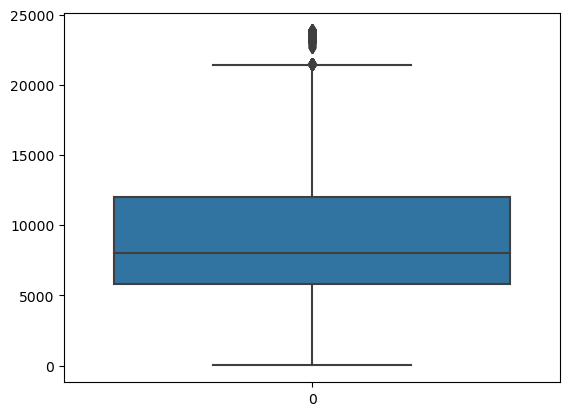

In [269]:
## Outlier detection
sns.boxplot(df_walmart['Purchase']);

We can see that there are lots of out liers in purchase amount. 

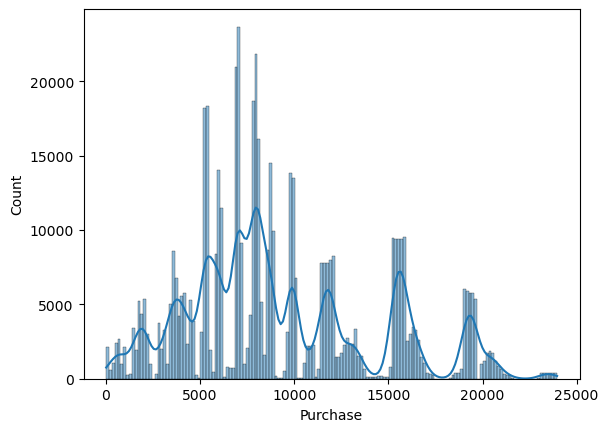

In [270]:
sns.histplot(df_walmart.Purchase, kde=True);

- Categorical variables can only be seen as count plot

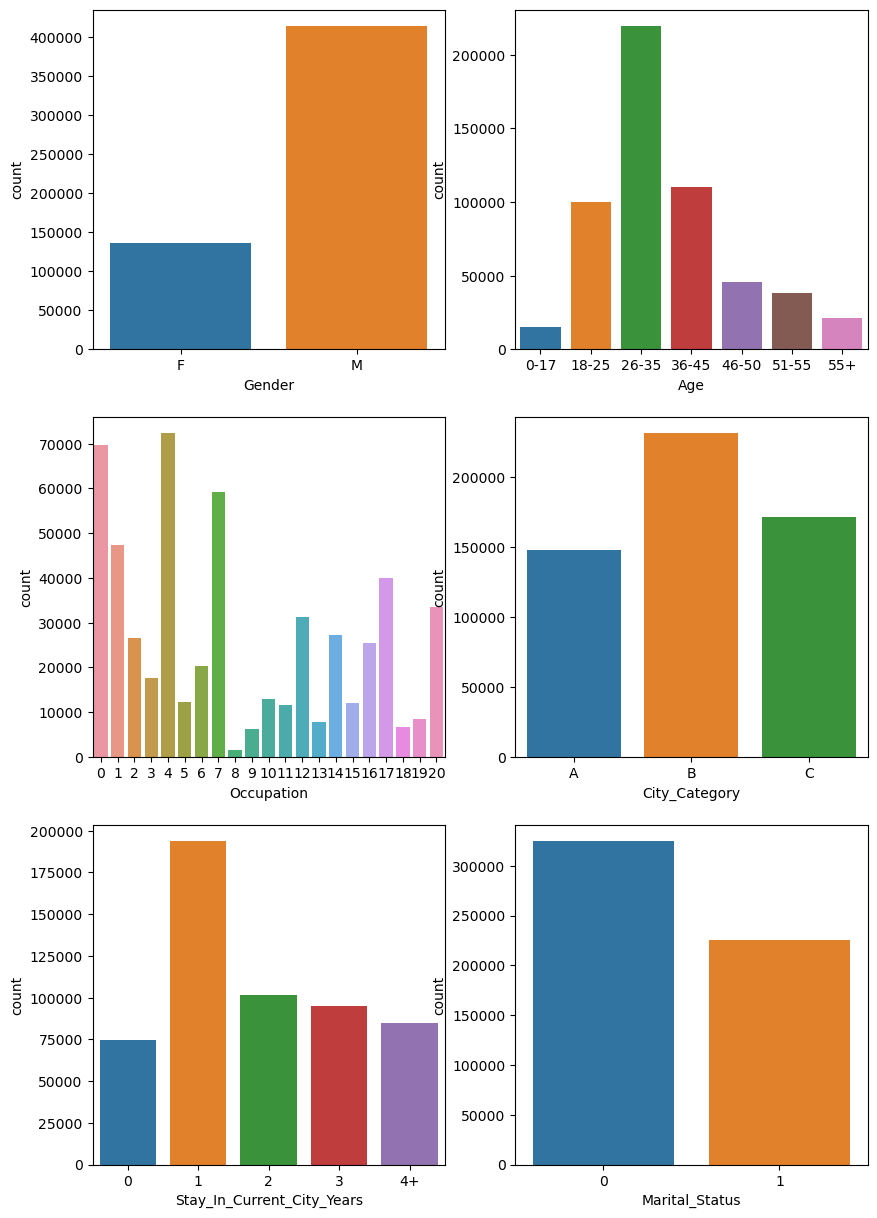

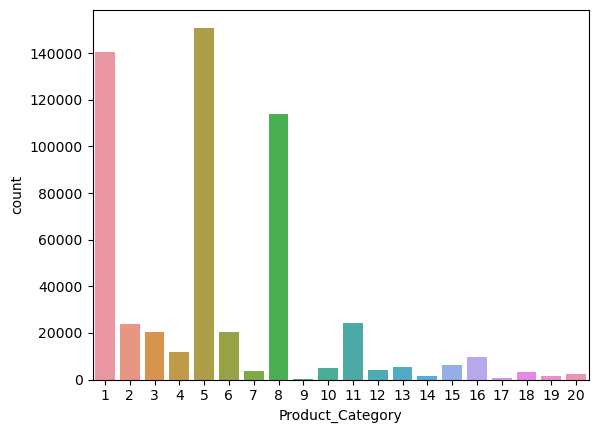

In [271]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
sns.countplot(data=df_walmart, x='Gender', ax=axs[0,0])
sns.countplot(data=df_walmart, x='Age', ax=axs[0,1])
sns.countplot(data=df_walmart, x='Occupation', ax=axs[1,0])
sns.countplot(data=df_walmart, x='City_Category', ax=axs[1,1])
sns.countplot(data=df_walmart, x='Stay_In_Current_City_Years', ax=axs[2,0])
sns.countplot(data=df_walmart, x='Marital_Status', ax=axs[2,1])
plt.show()
sns.countplot(data=df_walmart, x='Product_Category')
plt.show()

Observations:
- Unlike the popular belief 25% of the users are female and 75% are male. Need to explore more on it
- Users in age Group 26-35 takes ~40% and kids(<18) and old people are only~ 6.75%.
- We can notice a downward trend after the age of 35.
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- 59% of the users are single and 41 % of the users are Married.
- Most of the users belogs to City_category B.
- Single users are more as compared to married people.
- Top 3 Product_Category: 1,5 and 11

## Bivariate Analysis
We have 1- Numerical and 9 categorical Variables. 
For these features following plots can be drawn and anaalysed: 
- boxplots, voilonplot,and barplot
- countplot with hue

### Boxplot

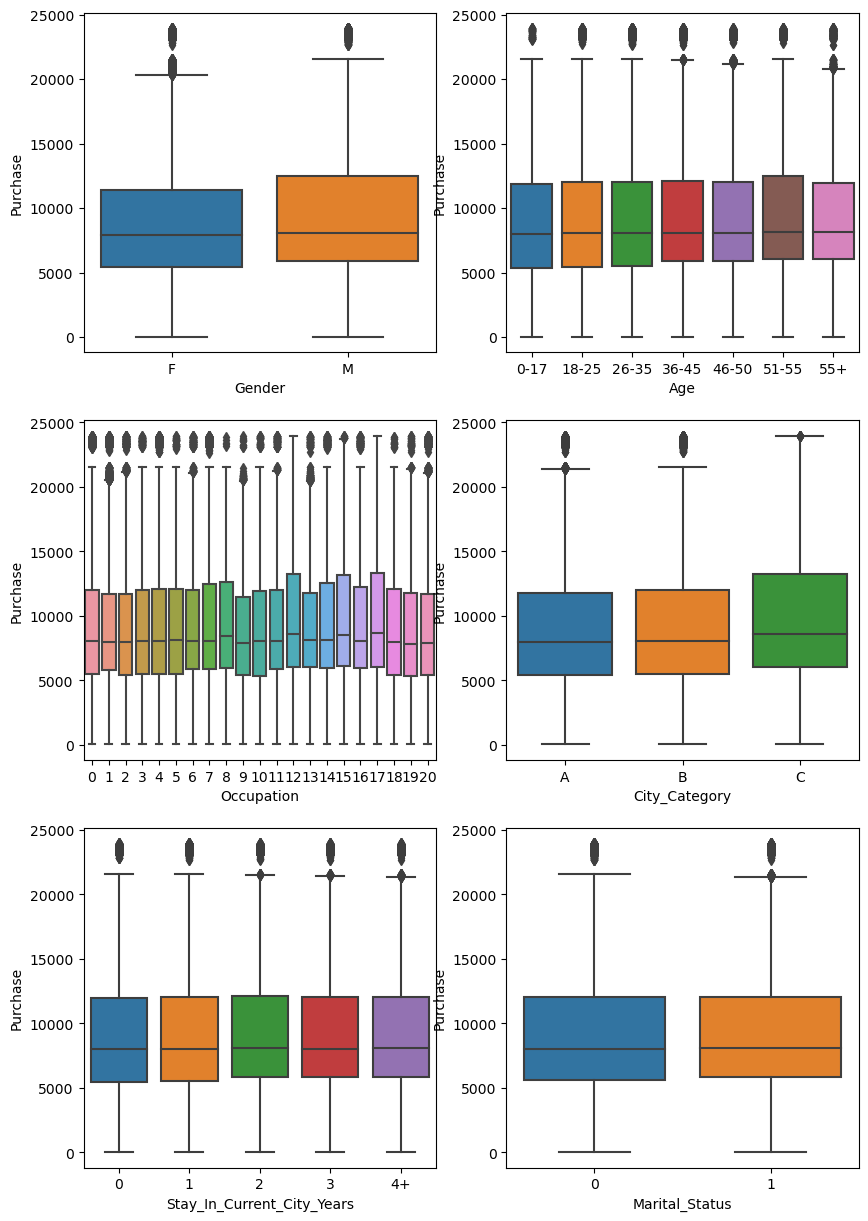

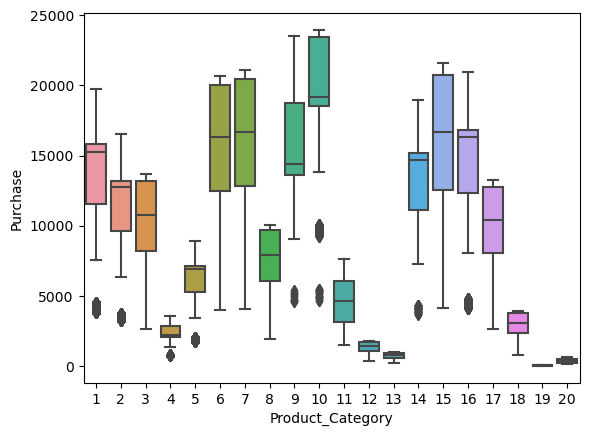

In [272]:
attrs = df_walmart.columns[2:-1].to_list() # consist all of the features except Purchase
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
count = 0
for row in range(3):
    for col in range(2):        
        sns.boxplot(data=df_walmart, x=attrs[count], y='Purchase', ax= axs[row, col])
        count+=1
plt.show()

sns.boxplot(data=df_walmart, y='Purchase', x=attrs[-1])
plt.show()


- we can see that there are outlier in all of the factors when we are comparing with respect to the Purchase amount. 
- In all of the features the outliers are in the top section except the product category.
- In product category, the outliers are in bottom side of the section. 

### Violin plot

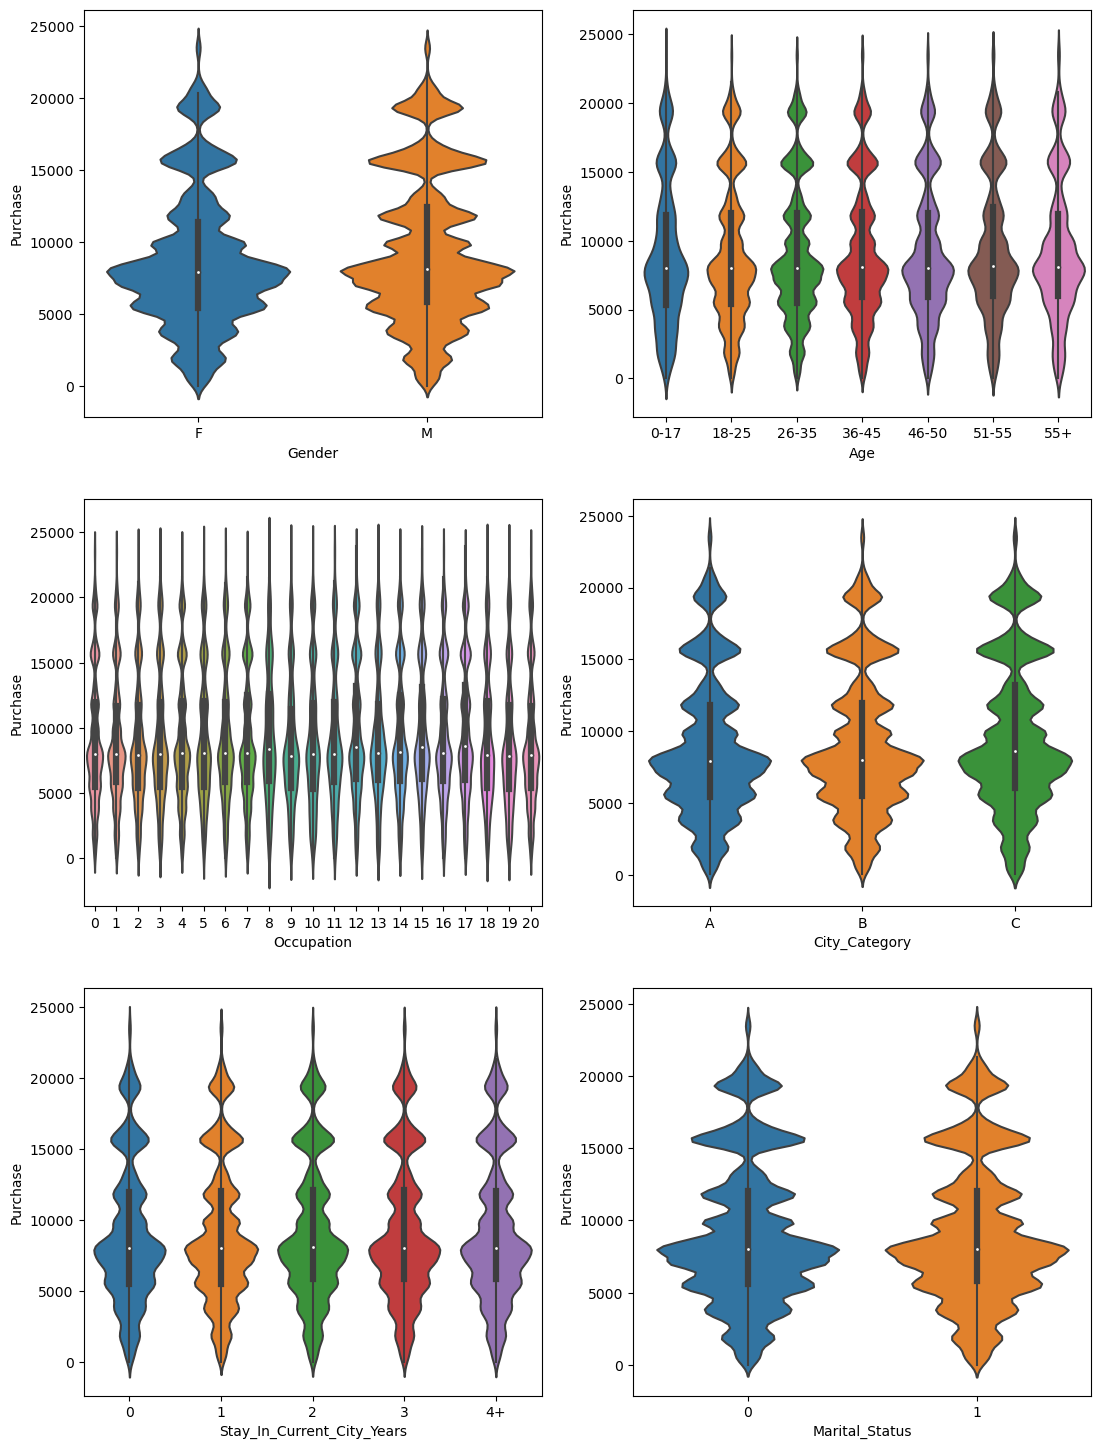

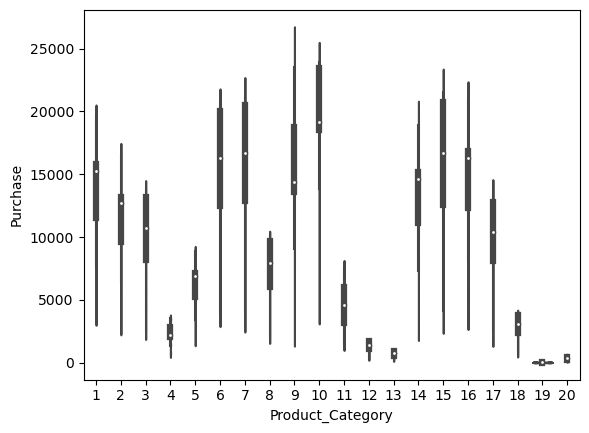

In [273]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13,18))
count = 0
for row in range(3):
    for col in range(2):        
        sns.violinplot(data=df_walmart, x=attrs[count], y='Purchase', ax= axs[row, col])
        count+=1
plt.show()

sns.violinplot(data=df_walmart, y='Purchase', x=attrs[-1])
plt.show()

- We can notice that the distribution of all the details(e.g. male/female) of all the features are the same. 
- Product category has very les distrubiton unable to identify as well.
- The outliers are responsible for a significant amount of purchase. This can be noticed in distribution in all the outliers and purchase. 

### Bar plots

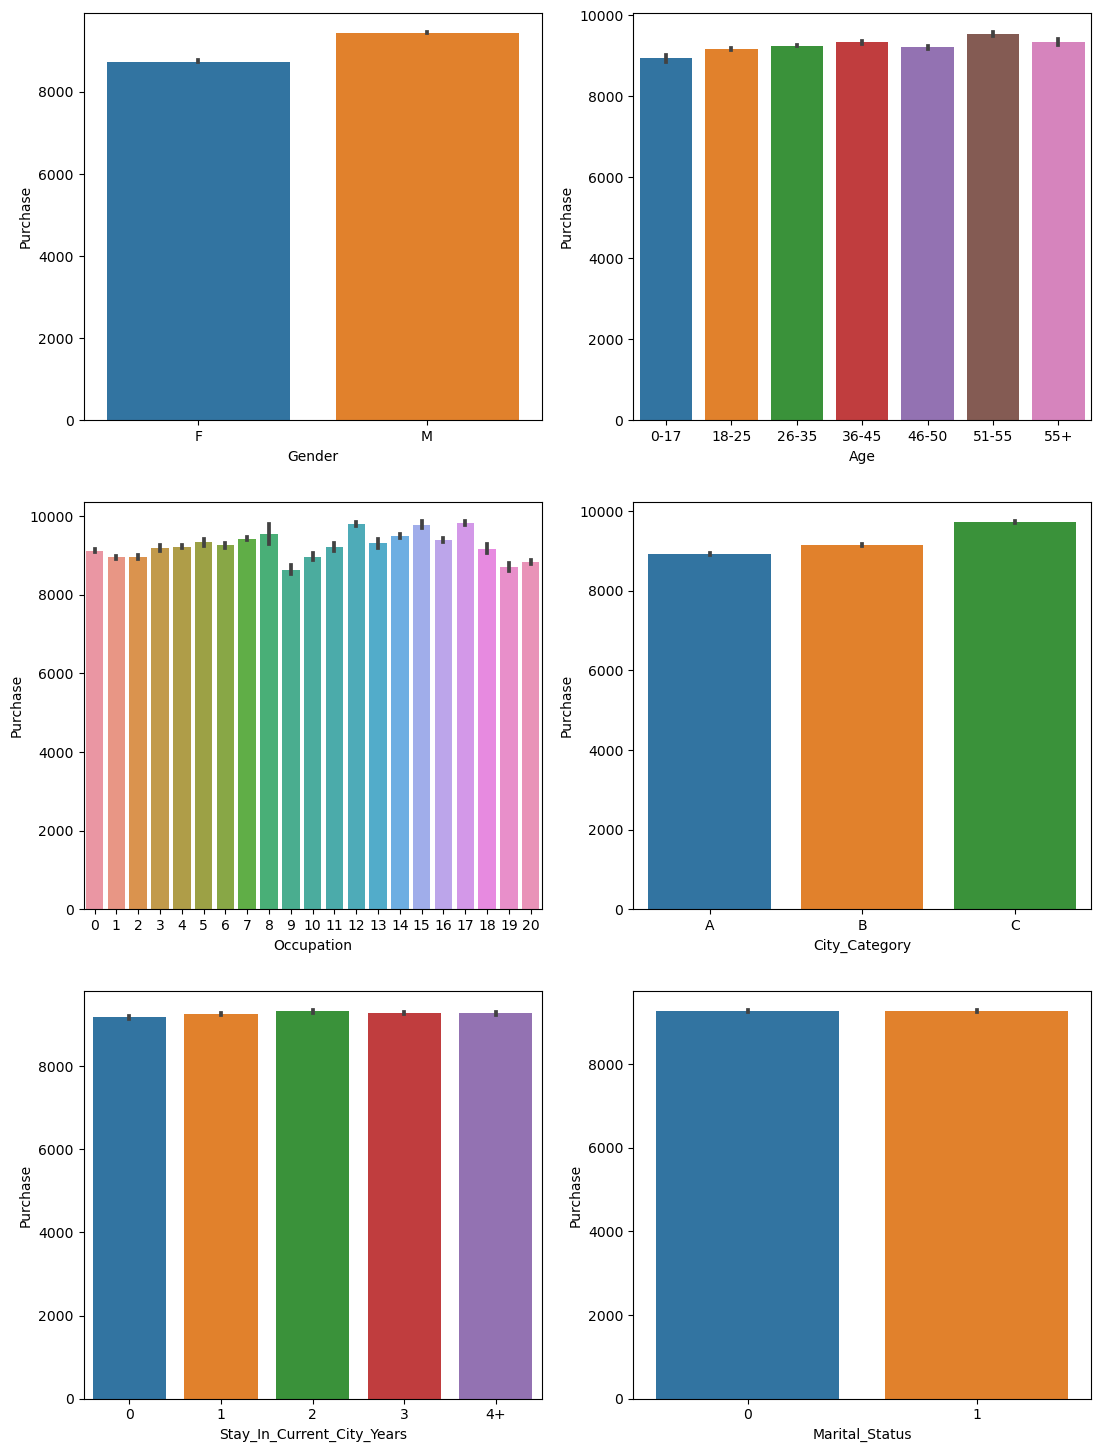

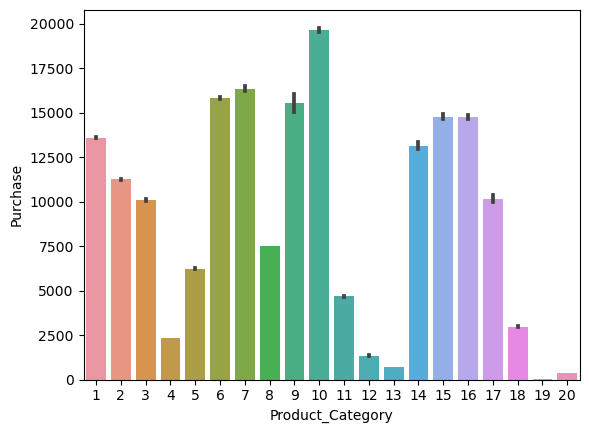

In [274]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13,18))
count = 0
for row in range(3):
    for col in range(2):        
        sns.barplot(data=df_walmart, x=attrs[count], y='Purchase', ax= axs[row, col])
        count+=1
plt.show()

sns.barplot(data=df_walmart, y='Purchase', x=attrs[-1])
plt.show()

- Males are purchasing more in comparison to female
- Most purchases are made among product category 10.
- Lowest pruchases are in Product category: 19, 20, 12, and 13.
- Almost all of Age segments are purchasing in stores.
- Occupation 9, 19 and 20 are the ones who purchase the lowest in the stores.
- Order of Purchase City Category wise si C>B>A. This can be because of multiple factors which can be looked into more depth. 
- Marital Status and # of years a person is staying in the city doesn't make any difference in this data. Which is a bit odd because if a person is married he will buy more as he lives with family. 


### Pair Plots

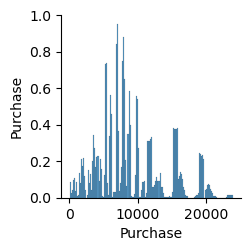

In [275]:
# We can see that pair plots wouldn't make any sense because we have only 1 numerical feature purchase
sns.pairplot(data=df_walmart);

### Heat map

- Heat Maps wouldn't make any sense because there is no numerical data

## Answering questions 

### Q1:Are women spending more money per transaction than men? Why or Why not?

In [355]:
df1 = df_walmart.groupby('Gender')['Purchase'].sum().reset_index()
df1

,Gender,Purchase
0,F,1186232642
1,M,3909580100


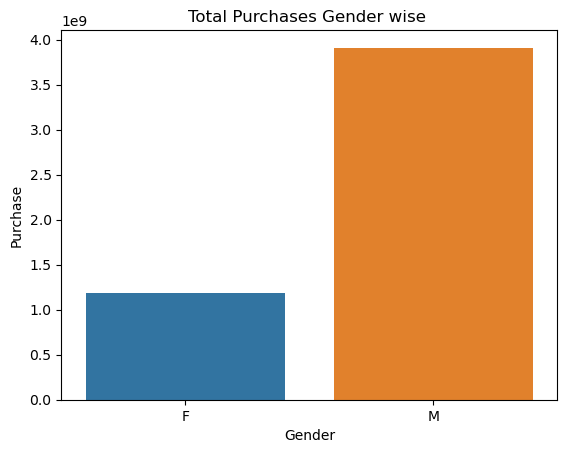

In [356]:
# sum of mal
sns.barplot(data = pd.DataFrame(df1), x='Gender', y='Purchase')
plt.title("Total Purchases Gender wise ")
plt.show()

In [357]:
df2 = df_walmart.groupby('Gender')['Purchase'].mean().reset_index()
df2

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


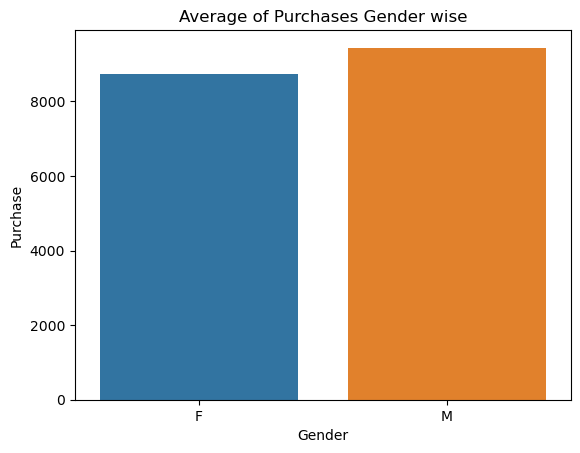

In [358]:
# sum of mal
sns.barplot(data = pd.DataFrame(df2), x='Gender', y='Purchase')
plt.title("Average of Purchases Gender wise")
plt.show()

M    75.310507
F    24.689493
Name: Gender, dtype: float64


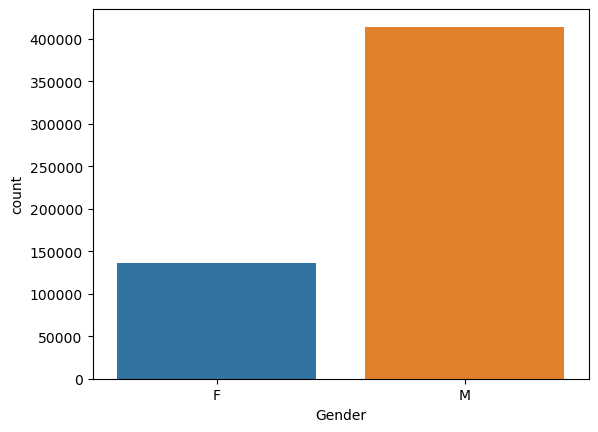

In [359]:
print(df_walmart['Gender'].value_counts(normalize=True)*100)
sns.countplot(data=df_walmart, x='Gender');

- We can see that most of purchases are made by men in our data. 
- This is because of the fact that proportions of female to male is 25%: 75% in our data.
- So we can conclude that females purchase more than males as females with 25% of population has an average of 8734.56 and males with 75% of population has averge 9437.52.

### Q2: Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [360]:
# number of male and female population
df_walmart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [361]:
# df_walmart.groupby(['User_ID', 'Gender'])['Purchase'].nunique(),
df_walmart['User_ID'].nunique()

5891

In [362]:
df = pd.DataFrame(df_walmart.groupby(['User_ID', 'Gender'])['Purchase'].sum().reset_index())
df_purchase_user_wise=df[df['Purchase']!=0][['Gender','Purchase']] # Droping User id as it is no longer needed
df_purchase_user_wise

,Gender,Purchase
0,F,334093
3,M,810472
5,M,341635
7,M,206468
9,M,821001
...,...,...
11772,F,4116058
11774,F,1119538
11776,F,90034
11778,F,590319


In [363]:
df_purchase_user_wise['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

- We can notice that we have only 5891 unique users. These consist of our male and female. 

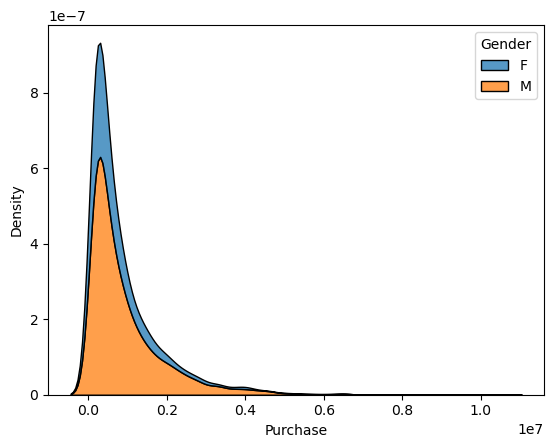

In [364]:
sns.kdeplot(data=df_purchase_user_wise, x='Purchase', hue='Gender', multiple='stack');

- We can notice that we have only 5891 unique users. These consist of our male and female.
- Female and Male purchases are right Skewed. 
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots
- We can see that there are only 4225 Males and 1666 Females.

In [365]:
# Creating seperate df to making counfidence interval and population mean
df_female = df_purchase_user_wise[df_purchase_user_wise['Gender']=='F']
df_male = df_purchase_user_wise[df_purchase_user_wise['Gender']=='M']

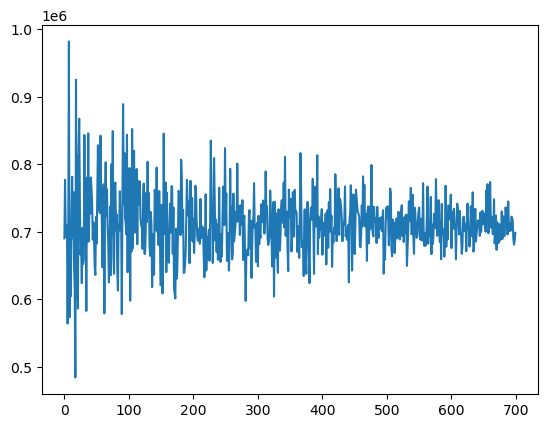

In [366]:
# Trying to find best sample size for female data size
sample_mean_trend = []
for i in np.arange(50,750):
    sample =df_female['Purchase'].sample(i)
    sample_mean_trend.append(np.mean(sample))
plt.plot(sample_mean_trend)
plt.show()

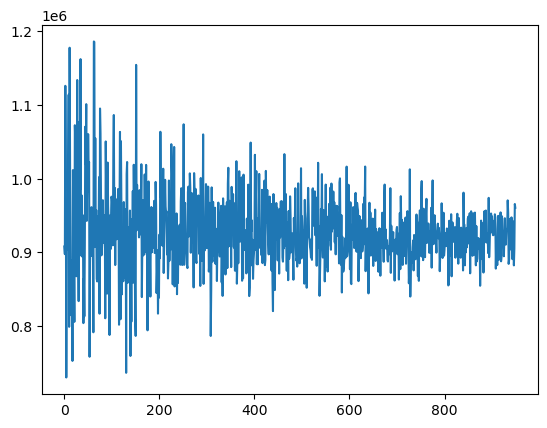

In [367]:
# Trying to find best sample size for male data size
sample_mean_trend = []
for i in np.arange(50,1000):
    sample =df_male['Purchase'].sample(i)
    sample_mean_trend.append(np.mean(sample))
plt.plot(sample_mean_trend);

- There is not much change after 400 for both male and female. Hence Taking 400 as sample size for male and female.

### Plotting 400 samples and trying to predict population mean

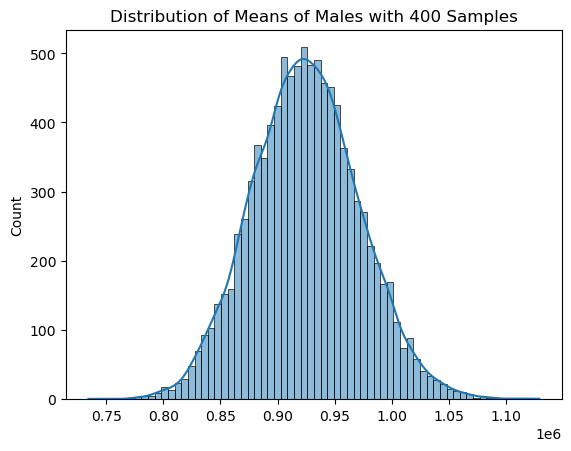

In [368]:
num_samples = 400
female_collect_sample_means = []
for person in range(10000):
    sample_mean = df_male['Purchase'].sample(num_samples).mean()
    female_collect_sample_means.append(sample_mean)
sns.histplot(female_collect_sample_means, kde=True)
plt.title("Distribution of Means of Males with 400 Samples");

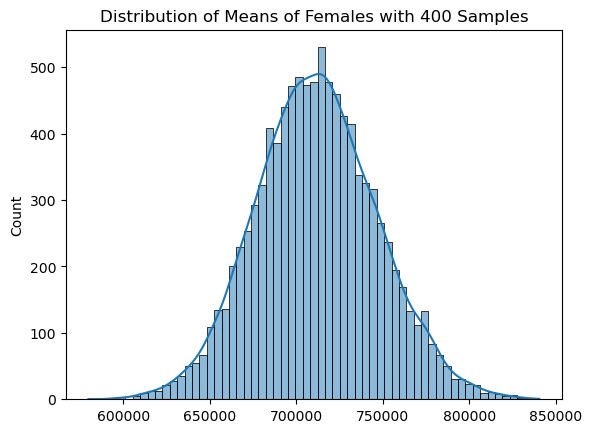

In [369]:
num_samples = 400
male_collect_sample_means = []
for person in range(10000):
    sample_mean = df_female['Purchase'].sample(num_samples).mean()
    male_collect_sample_means.append(sample_mean)
sns.histplot(male_collect_sample_means, kde=True)
plt.title("Distribution of Means of Females with 400 Samples");

- We can notice here that the Central Limit Theoram has been proved right. The deistribution with 400 samples is gaussian in the end.

In [370]:
np.mean(male_collect_sample_means), np.mean(female_collect_sample_means)
print(f"Predicted Population means of the males: ${np.round(np.mean(male_collect_sample_means),2)}")
print(f"Predicted Population means of the females: ${np.round(np.mean(female_collect_sample_means),2)}")

Predicted Population means of the males: $711775.68
Predicted Population means of the females: $924637.31


In [371]:
m_upper = np.round(np.percentile(male_collect_sample_means, 97.5),2)
m_lower = np.round(np.percentile(male_collect_sample_means, 2.5),2)
f_upper = np.round(np.percentile(female_collect_sample_means, 97.5),2)
f_lower = np.round(np.percentile(female_collect_sample_means, 2.5),2)
print(f"95% Confidence Interval Population means of the males: ({m_upper}, {m_lower})")
print(f"95% Confidence Interval Population means of the females: ({f_upper}, {f_lower})")


95% Confidence Interval Population means of the males: (781561.77, 645098.8)
95% Confidence Interval Population means of the females: (1018094.65, 835114.76)


### Q3: Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

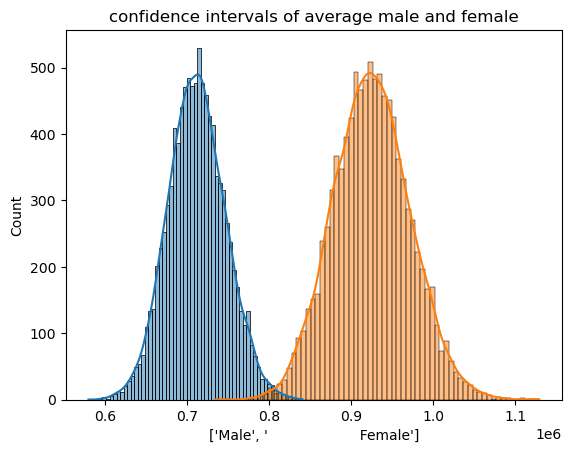

In [409]:
fig, axs =plt.subplots()
sns.histplot(male_collect_sample_means, kde=True, legend=True)
sns.histplot(female_collect_sample_means, kde=True,legend=True)

plt.title("confidence intervals of average male and female")
plt.xlabel(['Male',"                     "'Female']);

- We can clearly see that the confidence interval of Males and Females doesn't overlap. 
- 95% Confidence Interval Population means of the males: (782751.49, 645250.8)
- 95% Confidence Interval Population means of the females: (1020105.31, 834682.2)
- It is very beneficial for the wallmart as male and female can be easily targeted audiances are different. So walmart can easily dedicate the product in the price range as per the data. For example the females tend to spend more and they female products can be priced accordingly. 

### Q4: Married vs Unmarried 

#### Are Married spending more money per transaction than unmarried? Why or Why not?

In [373]:
df1 = df_walmart.groupby('Marital_Status')['Purchase'].sum().reset_index()

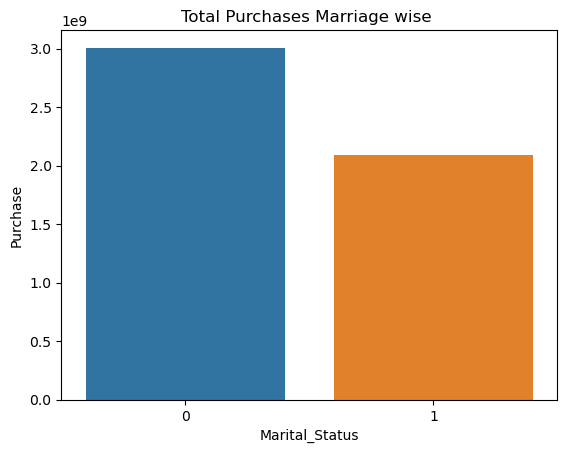

In [374]:
# sum of mal
sns.barplot(data = pd.DataFrame(df1), x='Marital_Status', y='Purchase')
plt.title("Total Purchases Marriage wise ")
plt.show()

In [375]:
df2 = df_walmart.groupby('Marital_Status')['Purchase'].mean().reset_index()
df2

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


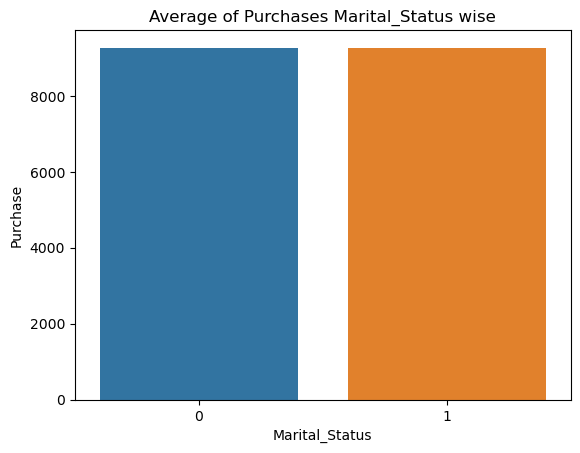

In [376]:
sns.barplot(data = pd.DataFrame(df2), x='Marital_Status', y='Purchase')
plt.title("Average of Purchases Marital_Status wise")
plt.show()

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64


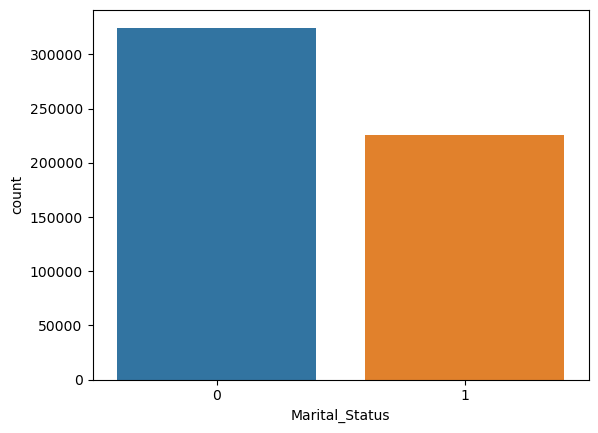

In [377]:
print(df_walmart['Marital_Status'].value_counts(normalize=True)*100)
sns.countplot(data=df_walmart, x='Marital_Status');

- Unmarried People has done more Purchases than married people.
- Average sales comes to be almost equal.

#### Confidence intervals and distribution of the mean of the expenses by Marital Status wise customers 

In [380]:
# number of people Marital_Status wise
df_walmart['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [384]:
df = pd.DataFrame(df_walmart.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum().reset_index())
df_purchase_marital_status_wise=df[df['Purchase']!=0][['Marital_Status','Purchase']] # Droping User id as it is no longer needed
df_purchase_marital_status_wise

,Marital_Status,Purchase
0,0,334093
2,0,810472
4,0,341635
7,1,206468
9,1,821001
...,...,...
11773,1,4116058
11774,0,1119538
11776,0,90034
11779,1,590319


In [386]:
df_purchase_marital_status_wise['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

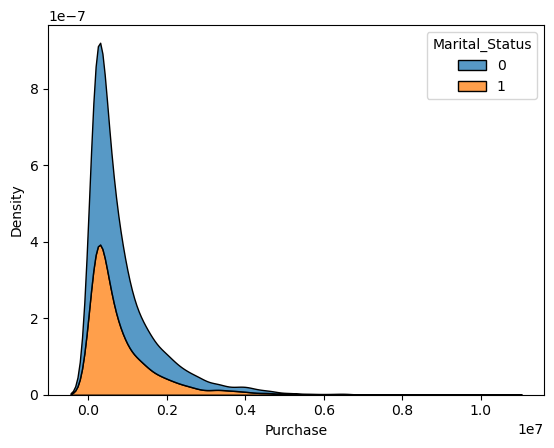

In [387]:
sns.kdeplot(data=df_purchase_marital_status_wise, x='Purchase', hue='Marital_Status', multiple='stack');

- There are 3417 unmarried and 2474 married people
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots


In [436]:
# Creating seperate df to making counfidence interval and population mean
df_unmarried = df_purchase_marital_status_wise[df_purchase_marital_status_wise['Marital_Status']==0]
df_married = df_purchase_marital_status_wise[df_purchase_marital_status_wise['Marital_Status']==1]

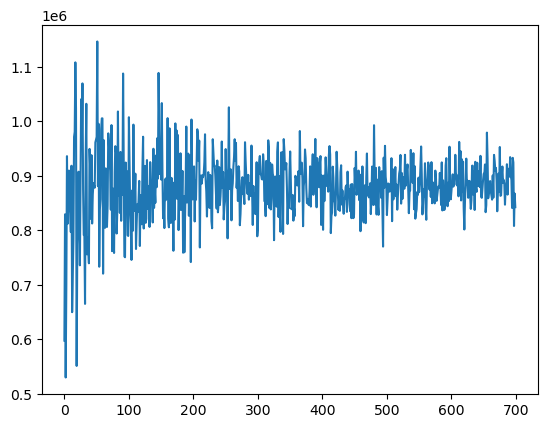

In [389]:
# Trying to find best sample size for unmarried data size
sample_mean_trend = []
for i in np.arange(50,750):
    sample =df_unmarried['Purchase'].sample(i)
    sample_mean_trend.append(np.mean(sample))
plt.plot(sample_mean_trend)
plt.show()

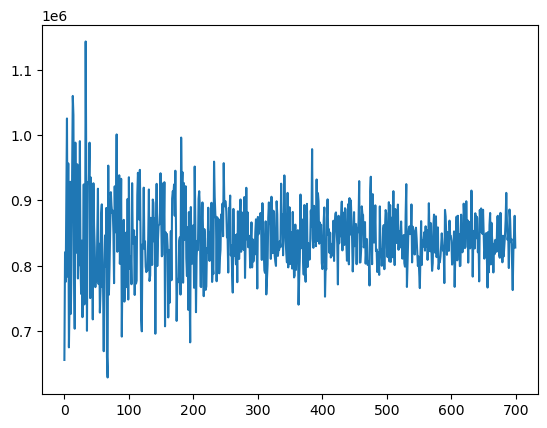

In [391]:
# Trying to find best sample size for married data size
sample_mean_trend = []
for i in np.arange(50,750):
    sample =df_married['Purchase'].sample(i)
    sample_mean_trend.append(np.mean(sample))
plt.plot(sample_mean_trend)
plt.show()

- We can see that 300 sample size seems to be perfect

##### Plotting 300 samples and trying to predict population mean

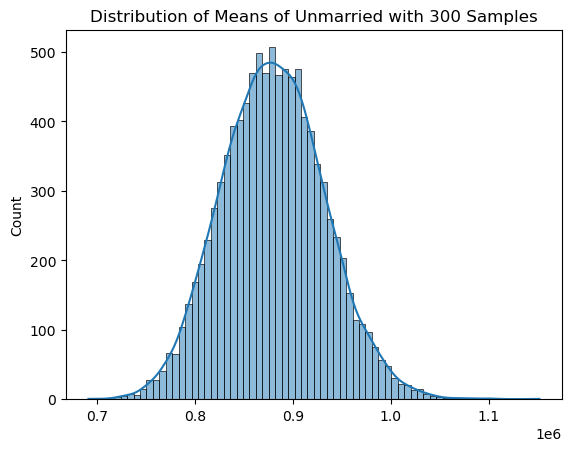

In [398]:
num_samples = 300
unmarried_collect_sample_means = []
for person in range(10000):
    sample_mean = df_unmarried['Purchase'].sample(num_samples).mean()
    unmarried_collect_sample_means.append(sample_mean)
sns.histplot(unmarried_collect_sample_means, kde=True)
plt.title("Distribution of Means of Unmarried with 300 Samples");

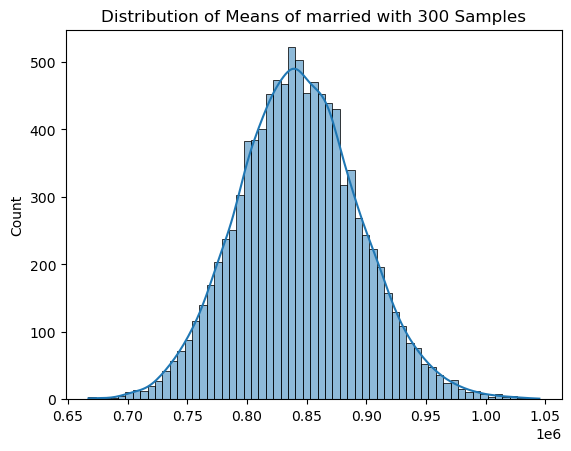

In [399]:
num_samples = 300
married_collect_sample_means = []
for person in range(10000):
    sample_mean = df_married['Purchase'].sample(num_samples).mean()
    married_collect_sample_means.append(sample_mean)
sns.histplot(married_collect_sample_means, kde=True)
plt.title("Distribution of Means of married with 300 Samples");

In [401]:
np.mean(unmarried_collect_sample_means), np.mean(married_collect_sample_means)
print(f"Predicted Population means of the Unmarried: ${np.round(np.mean(unmarried_collect_sample_means),2)}")
print(f"Predicted Population means of the Married: ${np.round(np.mean(married_collect_sample_means),2)}")

Predicted Population means of the Unmarried: $880286.01
Predicted Population means of the Married: $843560.42


In [404]:
upper1 = np.round(np.percentile(married_collect_sample_means, 97.5),2)
lower1 = np.round(np.percentile(married_collect_sample_means, 2.5),2)
upper2 = np.round(np.percentile(unmarried_collect_sample_means, 97.5),2)
lower2 = np.round(np.percentile(unmarried_collect_sample_means, 2.5),2)
print(f"95% Confidence Interval Population means of the Married: ({upper1}, {lower1})")
print(f"95% Confidence Interval Population means of the Unmarried: ({upper2}, {lower2})")


95% Confidence Interval Population means of the Married: (946621.04, 746166.04)
95% Confidence Interval Population means of the Unmarried: (985301.35, 781827.96)


#### Are confidence intervals of average married and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

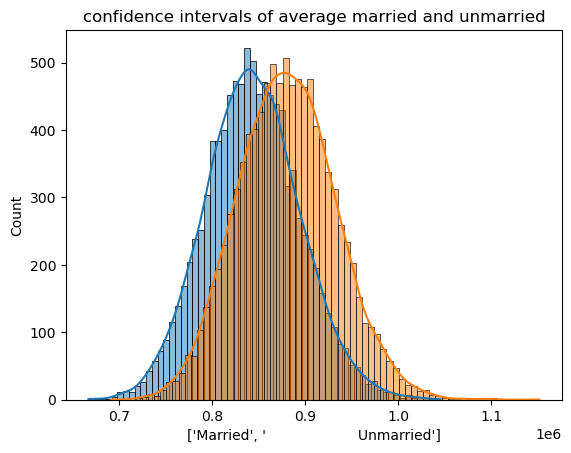

In [408]:
fig, axs =plt.subplots()
sns.histplot(married_collect_sample_means, kde=True, legend=True)
sns.histplot(unmarried_collect_sample_means, kde=True,legend=True)
plt.title("confidence intervals of average married and unmarried")
plt.xlabel(['Married',"                     "'Unmarried']);

- Confidence interval of Married and unmarried people coincide. Which means that company can targert both type of people as company is doing good to attract both of them.
- 95% Confidence Interval Population means of the Married: (946621.04, 746166.04)
- 95% Confidence Interval Population means of the Unmarried: (985301.35, 781827.96)

### Q5: Results when the same activity is performed for Age 

In [412]:
df1 = df_walmart.groupby('Age')['Purchase'].sum().reset_index()
df1

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


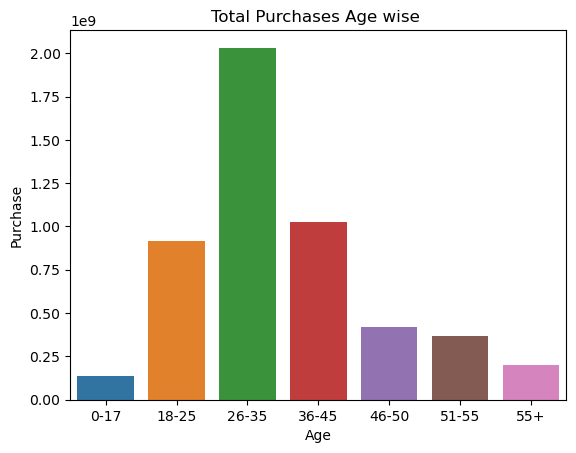

In [413]:
# sum of mal
sns.barplot(data = pd.DataFrame(df1), x='Age', y='Purchase')
plt.title("Total Purchases Age wise ")
plt.show()

In [421]:
df2 = df_walmart.groupby('Age')['Purchase'].mean().reset_index()
df2

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


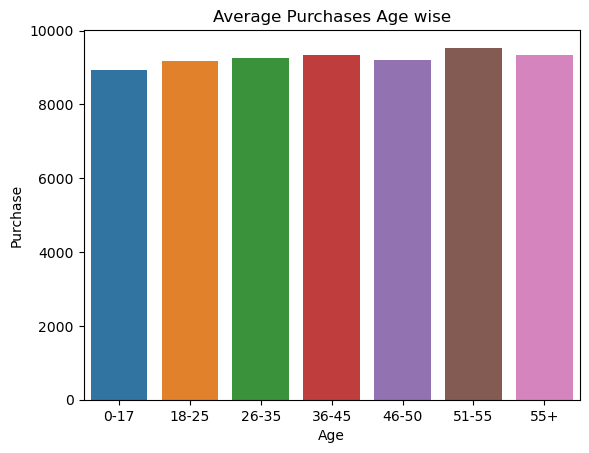

In [424]:
# sum of mal
sns.barplot(data = pd.DataFrame(df2), x='Age', y='Purchase')
plt.title("Average Purchases Age wise")
plt.show()

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64


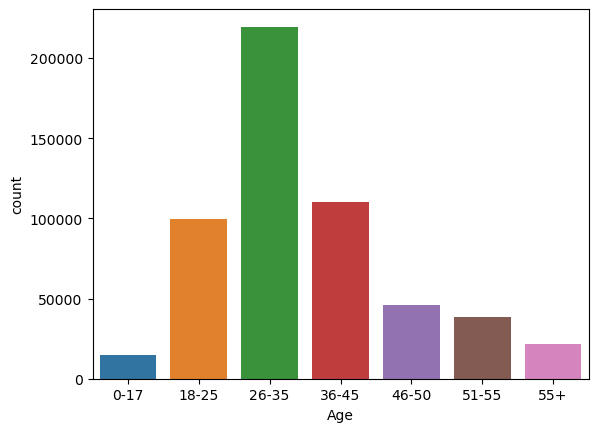

In [425]:
print(df_walmart['Age'].value_counts(normalize=True)*100)
sns.countplot(data=df_walmart, x='Age');

- Most Purchases are Made by 26-35 age group then followed by 36-45 and 18-25.

##### Confidence intervals and distribution of the mean of the expenses Age of the Customers

In [427]:
# number of cusotmers age wise
df_walmart['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [428]:
df_walmart['User_ID'].nunique()

5891

In [433]:
df = pd.DataFrame(df_walmart.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index())
df_purchase_age_wise=df[df['Purchase']!=0][['Age','Purchase']] # Droping User id as it is no longer needed
df_purchase_age_wise

,Age,Purchase
0,0-17,334093
13,55+,810472
16,26-35,341635
25,46-50,206468
30,26-35,821001
...,...,...
41204,26-35,4116058
41213,46-50,1119538
41222,55+,90034
41227,46-50,590319


In [434]:
df_purchase_age_wise['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

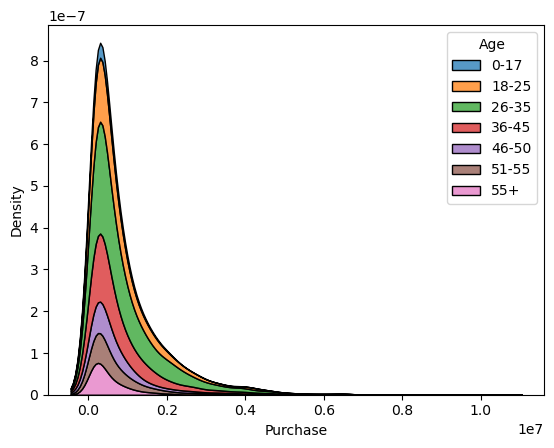

In [435]:
sns.kdeplot(data=df_purchase_age_wise, x='Purchase', hue='Age', multiple='stack');

- We can see the see the pattern of purchase as per the age in the above graph.
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots 

In [439]:
# Creating seperate df to making counfidence interval and population mean
df_0_17 = df_purchase_age_wise[df_purchase_age_wise['Age']=='0-17']
df_18_25 = df_purchase_age_wise[df_purchase_age_wise['Age']=='18-25']
df_26_35 = df_purchase_age_wise[df_purchase_age_wise['Age']=='26-35']
df_36_45 = df_purchase_age_wise[df_purchase_age_wise['Age']=='36-45']
df_46_50 = df_purchase_age_wise[df_purchase_age_wise['Age']=='46-50']
df_51_55 = df_purchase_age_wise[df_purchase_age_wise['Age']=='51-55']
df_55plus = df_purchase_age_wise[df_purchase_age_wise['Age']=='55+']

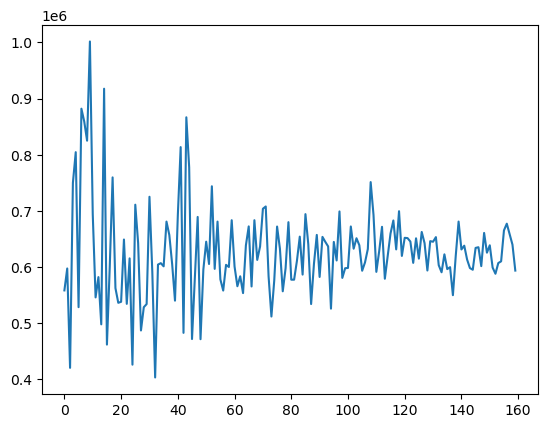

In [442]:
# Trying to find best sample size for age: 0_17
sample_mean_trend_0_17 = []
for i in np.arange(10,170):
    sample =df_0_17['Purchase'].sample(i)
    sample_mean_trend_0_17.append(np.mean(sample))
plt.plot(sample_mean_trend_0_17)
plt.show()

- Sample Size can be taken as 120

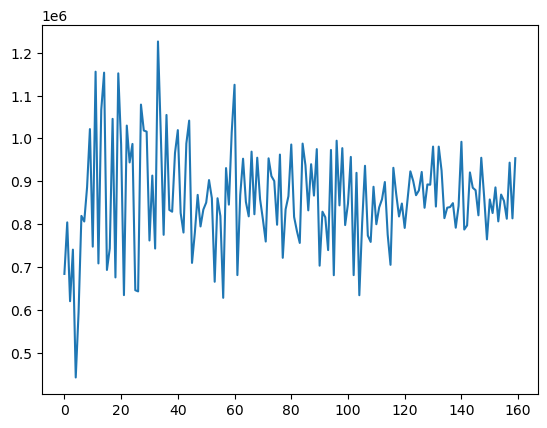

In [443]:
# Trying to find best sample size for age: 18-25
sample_mean_trend_18_25 = []
for i in np.arange(10,170):
    sample =df_18_25['Purchase'].sample(i)
    sample_mean_trend_18_25.append(np.mean(sample))
plt.plot(sample_mean_trend_18_25)
plt.show()

- Sample Size can be taken as 120

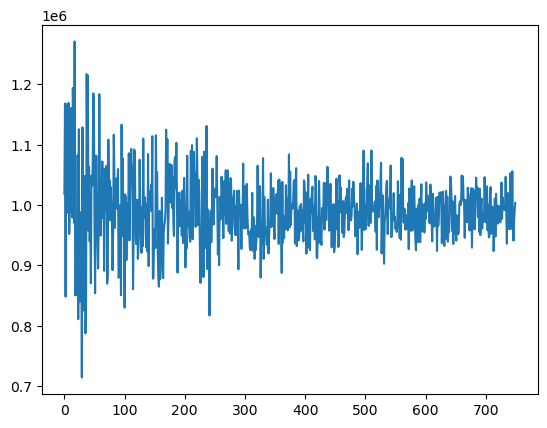

In [445]:
# Trying to find best sample size for age: 18-25
sample_mean_trend_26_35 = []
for i in np.arange(50,800):
    sample =df_26_35['Purchase'].sample(i)
    sample_mean_trend_26_35.append(np.mean(sample))
plt.plot(sample_mean_trend_26_35)
plt.show()

- Sample Size can be taken as 300

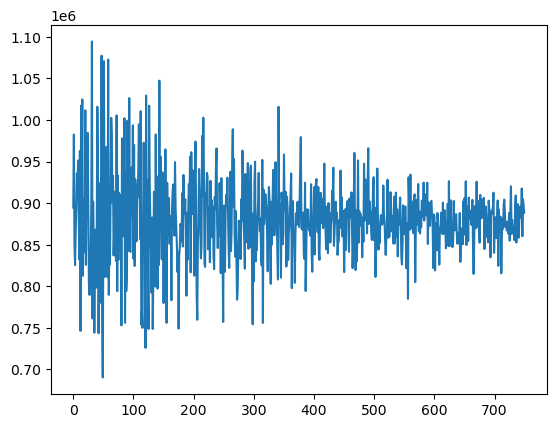

In [446]:
# Trying to find best sample size for age: df_36_45
sample_mean_trend_36_45 = []
for i in np.arange(50,800):
    sample =df_36_45['Purchase'].sample(i)
    sample_mean_trend_36_45.append(np.mean(sample))
plt.plot(sample_mean_trend_36_45)
plt.show()

- Sample Size can be taken as 450

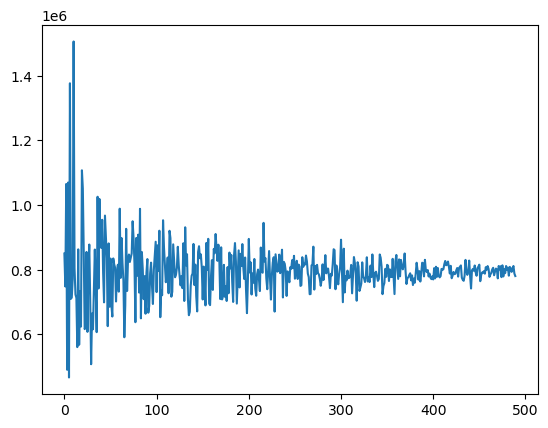

In [450]:
# Trying to find best sample size for age: df_46_50
sample_mean_trend_46_50 = []
for i in np.arange(10,500):
    sample =df_46_50['Purchase'].sample(i)
    sample_mean_trend_46_50.append(np.mean(sample))
plt.plot(sample_mean_trend_46_50)
plt.show()

- Sample Size can be taken as 250

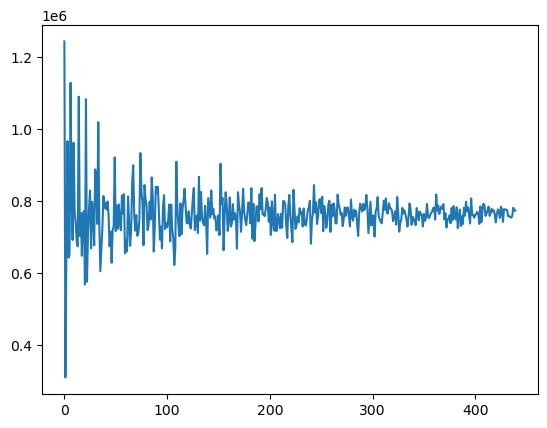

In [451]:
# Trying to find best sample size for age: df_51_55
sample_mean_trend_51_55 = []
for i in np.arange(10,450):
    sample =df_51_55['Purchase'].sample(i)
    sample_mean_trend_51_55.append(np.mean(sample))
plt.plot(sample_mean_trend_51_55)
plt.show()

- Sample Size can be taken as 250

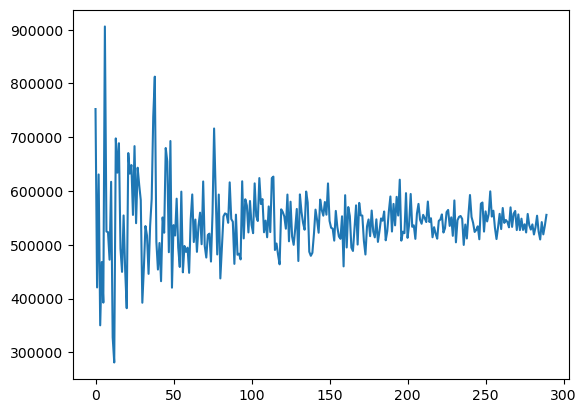

In [452]:
# Trying to find best sample size for age: df_51_55
sample_mean_trend_55plus = []
for i in np.arange(10,300):
    sample =df_55plus['Purchase'].sample(i)
    sample_mean_trend_55plus.append(np.mean(sample))
plt.plot(sample_mean_trend_55plus)
plt.show()

- Sample Size can be taken as 150

#### Are confidence intervals of average age wise spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

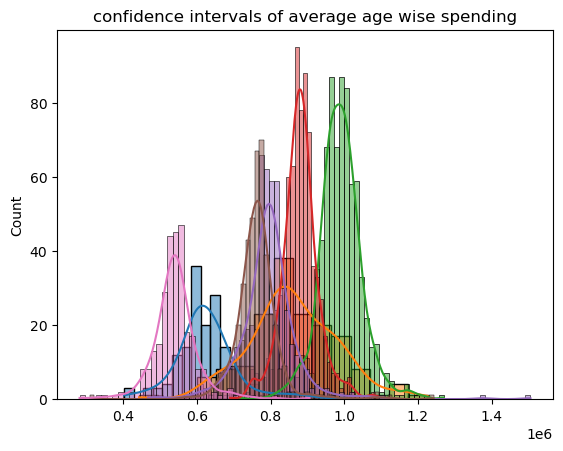

In [455]:
fig, axs =plt.subplots()
sns.histplot(sample_mean_trend_0_17, kde=True, legend=True)
sns.histplot(sample_mean_trend_18_25, kde=True,legend=True)
sns.histplot(sample_mean_trend_26_35, kde=True,legend=True)
sns.histplot(sample_mean_trend_36_45, kde=True,legend=True)
sns.histplot(sample_mean_trend_46_50, kde=True,legend=True)
sns.histplot(sample_mean_trend_51_55, kde=True,legend=True)
sns.histplot(sample_mean_trend_55plus, kde=True,legend=True)
plt.title("confidence intervals of average age wise spending");


- We can see the see the pattern of purchase as per the age in the above graph.
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots 
- Teh confidence interval does collide with all the ages across. but the age group of children and older people is affected ht most. Which can be a focus area for the company.

### Q5: Final Insights

Observations:
- Unlike the popular belief 25% of the users are female and 75% are male. Need to explore more on it
- Users in age Group 26-35 takes ~40% and kids(<18) and old people are only~ 6.75%.
- We can notice a downward trend after the age of 35.
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- 59% of the users are single and 41 % of the users are Married.
- Most of the users belogs to City_category B.
- Single users are more as compared to married people.
- Top 3 Product_Category: 1,5 and 11

- we can see that there are outlier in all of the factors when we are comparing with respect to the Purchase amount. 
- In all of the features the outliers are in the top section except the product category.
- In product category, the outliers are in bottom side of the section. 
- We can notice that the distribution of all the details(e.g. male/female) of all the features are the same. 
- Product category has very les distrubiton unable to identify as well.
- The outliers are responsible for a significant amount of purchase. This can be noticed in distribution in all the outliers and purchase. 
- We can see that in purchase mean is to the right of the median then we can say that the data is slightly right skewed.
- There are total 20 types of products.
- There are 21 types occupation available in the state.


- Males are purchasing more in comparison to female
- Most purchases are made among product category 10.
- Lowest pruchases are in Product category: 19, 20, 12, and 13.
- Almost all of Age segments are purchasing in stores.
- Occupation 9, 19 and 20 are the ones who purchase the lowest in the stores.
- Order of Purchase City Category wise si C>B>A. This can be because of multiple factors which can be looked into more depth. 
- Marital Status and # of years a person is staying in the city doesn't make any difference in this data. Which is a bit odd because if a person is married he will buy more as he lives with family. 


- We can see that most of purchases are made by men in our data. 
- This is because of the fact that proportions of female to male is 25%: 75% in our data.
- So we can conclude that females purchase more than males as females with 25% of population has an average of 8734.56 and males with 75% of population has averge 9437.52.

- We can notice that we have only 5891 unique users. These consist of our male and female.
- Female and Male purchases are right Skewed. 
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots
- We can see that there are only 4225 Males and 1666 Females.

- We can clearly see that the confidence interval of Males and Females doesn't overlap. 
- 95% Confidence Interval Population means of the males: (782751.49, 645250.8)
- 95% Confidence Interval Population means of the females: (1020105.31, 834682.2)
- It is very beneficial for the wallmart as male and female can be easily targeted audiances are different. So walmart can easily dedicate the product in the price range as per the data. For example the females tend to spend more and they female products can be priced accordingly. 

- Unmarried People has done more Purchases than married people.
- Average sales comes to be almost equal.

- We can see the see the pattern of purchase as per the age in the above graph.
- Data being right skewed also points to that we have outlier in expesive purchases. This has been noticed in the above bar plots and violin plots 
- Teh confidence interval does collide with all the ages across. but the age group of children and older people is affected ht most. Which can be a focus area for the company.

### Q6: Recommendation

- Gender wise population have diffenrent habits. This can be helpful to target specific type of people.
- Males tend to spend less so they can be attracted with cheap products and females can be attracted with expensive products.
- Children, teenager and old people doesnt' spend much this can be because of the transportation reason. Because they may not able to reach to the stor.
- Company can attract them either to some kind of online store/ help them with transportation to the nearest bus stop etc.
- There are some people who are spending way more than the average people these people. Need to look into about the rest of people why is the gap between them. 
- Married and unmarried people tend to spend the same so its not much useful.
- Rest of the factors don't provide much of the information. We can dig deeper with more data. 